## Practice 6 - *Implementation of gradient methods*

*Optimization: GD vs SGD vs mini-batch SGD*

Kolos Maria BSE141

In [1]:
import numpy as np

### Implemeting GD function 

In [2]:
def sigmoid(weights,X):
    res= 1 / (1 + np.exp(-X.dot(weights)))
    return res
    
def gradient(X,y,weights,beta,gamma):
    
    step0=weights.dot(X.T)*y
    
    step1 = -(y)*np.exp(-step0) / (1 + np.exp(-step0))
    
    reg = 2*beta * weights + gamma*np.sign(weights)
    grad = step1.dot(X)+ reg.T
    grad[0]-= reg[0] 
        
    return grad

def loss(X,y,weights,beta,gamma):
    l=len(X)
    sg = 1 + np.exp(-weights.dot(X.T)*y)
    
    final = np.log(sg) 
    reg=np.dot(weights,weights)*beta/l +np.sum(abs(weights))*gamma/l
    
    return np.mean(final)+reg  

def GD(X, y, max_epoch = 1000, alpha = 0.1, gamma = 0, beta = 0, tol = 0.0001): 
    shape = X.shape
    l=len(X)
    y=np.squeeze(y)
    weights = np.zeros(shape[1])
    cost_iter = []
    cost = loss(X,y,weights,beta,gamma)
    cost_iter.append([0,cost])
    change_cost = 1
    i = 1
    while(change_cost>tol and i<max_epoch):
        old_cost = cost
        weights = weights - (alpha * gradient(X,y,weights,beta,gamma))/l
         
        cost = loss(X,y,weights,beta,gamma)
        #print(cost)
        cost_iter.append([i,cost])
        change_cost = old_cost - cost
        i+=1
    return weights,np.array(cost_iter )      
   

### Implemeting SGD function

In [3]:
from random import sample

def get_batch(X,y,batch_size):
    sampleX=[]
    sampleY=[]
    indices = sample(range(len(X)), batch_size)
    for i in indices:
        sampleX.append(X[i])
        sampleY.append(y[i])
    return np.array(sampleX),np.array(sampleY)
    
def SGD(X, y, batch_size = 1, max_epoch = 1000, alpha = 0.1, gamma = 0, beta = 0):
    shape = X.shape
    l=len(X)
    y=np.squeeze(y)
    weights = np.zeros(shape[1])
    cost_iter = []
    batch_X,batch_y=get_batch(X,y, batch_size)
    cost = loss(batch_X, batch_y,weights,beta,gamma)
    cost_iter.append([0,cost])
    change_cost = 1
    i = 1
    while(i<max_epoch):
        old_cost = cost
        #print('loss: ',cost)
        batch_X,batch_y=get_batch(X,y,batch_size)
        #decreasing step size
        weights = weights - ((alpha) * gradient(batch_X, batch_y,weights,beta,gamma))/l
        cost = loss(batch_X, batch_y,weights,beta,gamma)
        cost_iter.append([i,cost])
        change_cost = old_cost - cost
        i+=1
    return weights,np.array(cost_iter) 

### Predict

In [4]:
def predict(weights,X,value=False,alpha=0.5):
    pred_prob = sigmoid(weights, X)
    pred_value = np.where(pred_prob >= alpha, 1, -1)
    if(value):
        return pred_value
    return pred_prob

In [5]:
from sklearn.preprocessing import StandardScaler

### Generating two-dimentional data

In [6]:
N=200
meanA=[4,3]
meanB=[7,4]
cov_matrix=[[1,0],[0,5]]
A=np.random.multivariate_normal(meanA,cov_matrix,N)
B=np.random.multivariate_normal(meanB,cov_matrix,N)

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches
%matplotlib inline

In [8]:
#Scaling and adding a constant feature
def preprocess_x(data):
    return np.c_[np.ones(len(data)),StandardScaler().fit_transform(data)]

In [9]:
#constructing a dataset
dataset = np.r_[A,B]
dataset = preprocess_x(dataset)
y=np.r_[np.ones(N),-np.ones(N)]

In [10]:
#illustrating classes and decision boundary
def plot_logit(data,labels,w,title):
    colors={1:'r',-1:'b'}
    for i in range(len(data)):
        plt.scatter(data[i][1],data[i][2],c=colors[labels[i]])  
    
    xx = np.linspace(-1, 1, 20)     
    yy = -(w[0]+w[1]*xx)/w[2]

    plt.plot(xx,yy)
    plt.ylim(-5,5)
    plt.xlim(-5,5)
    plt.title(title)
    plt.ylabel('x1')
    plt.xlabel('x0')
    plt.show()

#### Evluating gradient descent

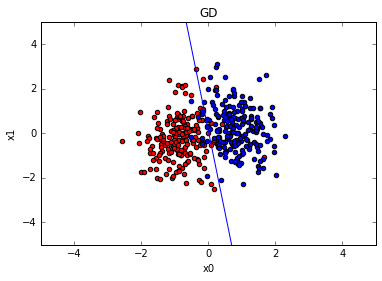

In [11]:
w,l=GD(dataset, y)

plot_logit(dataset,y,w,'GD')

#### Evluating mini-batches

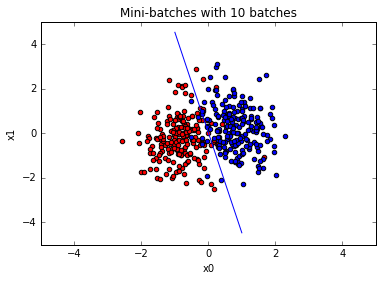

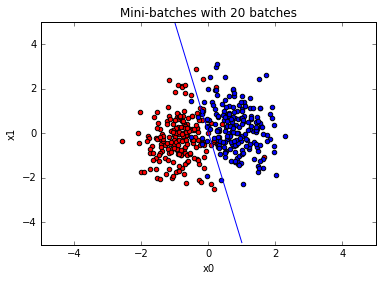

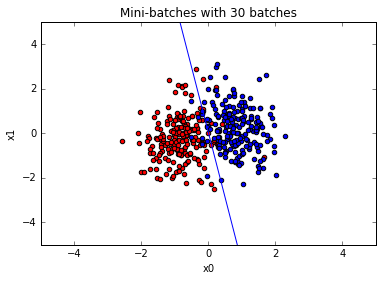

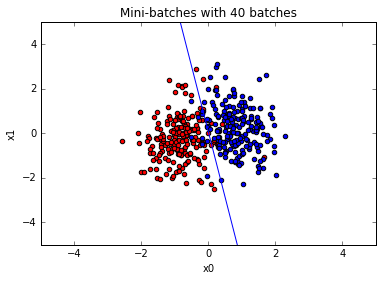

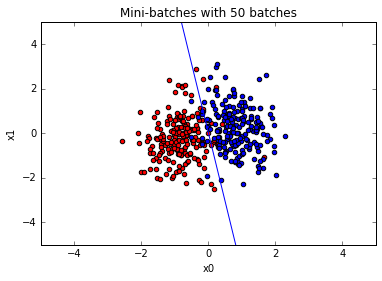

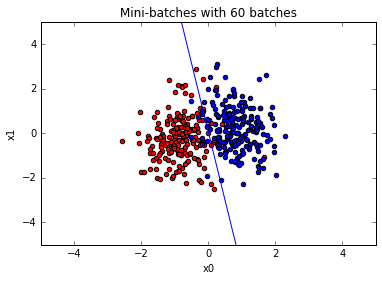

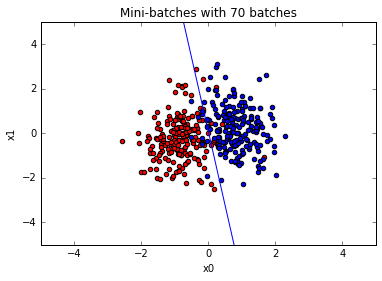

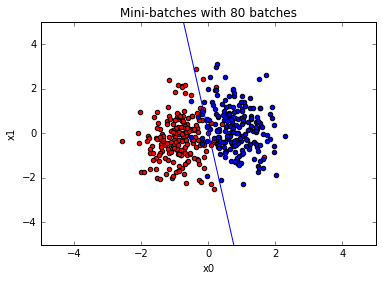

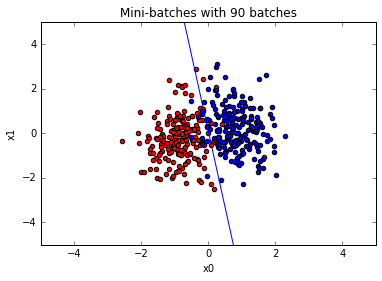

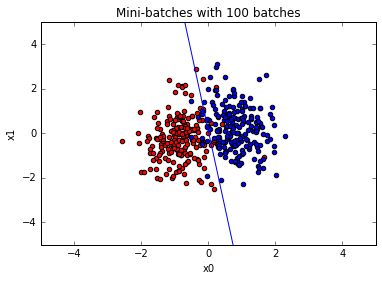

In [12]:
batch_size=list(np.linspace(10,100,10))

for bs in batch_size:
    w,l=SGD(dataset, y,batch_size=int(bs))
    plot_logit(dataset,y,w,'Mini-batches with %d batches' % (bs))

In [13]:
w1,l1=GD(dataset, y)
w2,l2=SGD(dataset, y,batch_size=1)
w3,l3=SGD(dataset, y,batch_size=20)

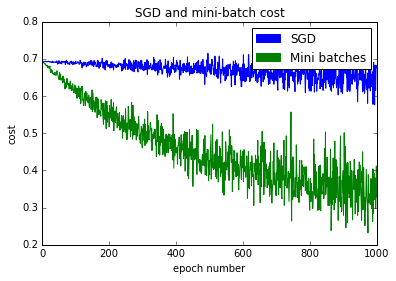

In [14]:
plt.plot(l2[:,0],l2[:,1])
plt.plot(l3[:,0],l3[:,1])
blue_patch = mpatches.Patch(color='blue', label='SGD')
green_patch = mpatches.Patch(color='green', label='Mini batches')
plt.legend(handles=[blue_patch,green_patch])
plt.title('SGD and mini-batch cost')
plt.ylabel('cost')
plt.xlabel('epoch number')
plt.show()

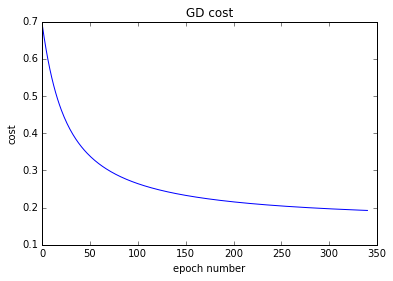

In [15]:
plt.title('GD cost')
plt.ylabel('cost')
plt.xlabel('epoch number')
plt.plot(l1[:,0],l1[:,1])

## Regularization

In [16]:
import pickle
with open('first_dataset.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [17]:
X_test=p['test_data']
X_train=p['train_data']
y_test=p['test_labels']
y_train=p['train_labels']

In [18]:
X_test=preprocess_x(X_test)
X_train=preprocess_x(X_train)

### Analizing classification results for train and test sets

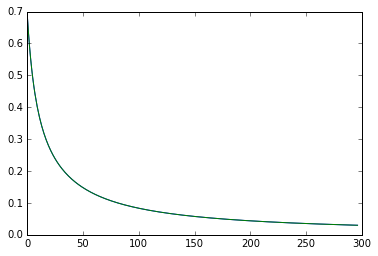

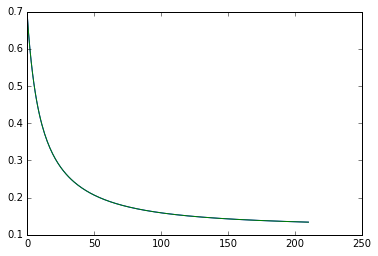

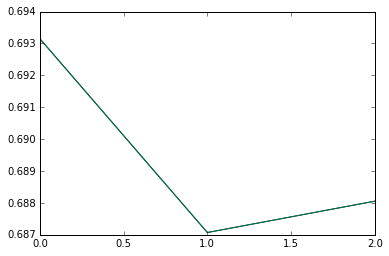

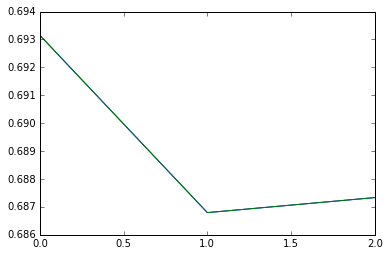

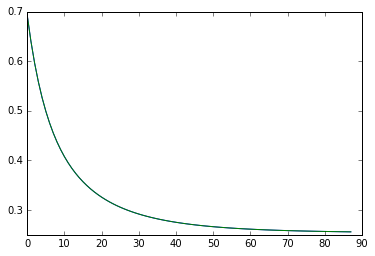

In [19]:
reg=[[0,0],[0.5,0.5],[10,10],[10,0],[0,10]]
for tup in reg:
    w_train,l_train=GD(X_train,y_train,gamma=tup[0],beta=tup[1])
    w_test,l_test=GD(X_train,y_train,gamma=tup[0],beta=tup[1])
    plt.plot(l_test[:,0],l_test[:,1])
    plt.plot(l_train[:,0],l_train[:,1])
    plt.show()

For some reason results with train and test set don't seem to differ...

### Running GD with l1-regularization

In [20]:
w,l=GD(X_train,y_train,gamma=0.5)

In [21]:
max_ind=w.argsort()[-2:]#picking up two the most important features

In [22]:
X_train.shape

(200, 301)

In [23]:
sample_X=np.c_[X_test[:,0],X_test[:,max_ind[0]],X_test[:,max_ind[1]]]#resampling

In [24]:
w,l=GD(sample_X,y_test)

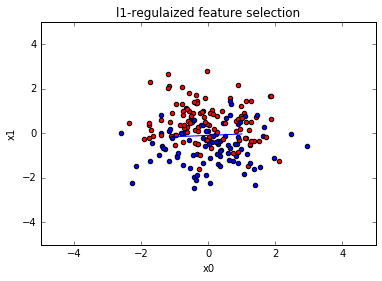

In [25]:
plot_logit(sample_X,y_test,w,'l1-regulaized feature selection')

Conclusion: L1-regularization does help to select features since it narrows the weights of those which are not significant

## Model evaluation

In [28]:
import pickle
with open('diabetes.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [29]:
X,y=p['data'],p['labels']

In [30]:
X=preprocess_x(X)

#### Running mini-batch regression with batches=20

In [31]:
w,l=SGD(X,y,batch_size=20)

In [32]:
w

array([-0.2985831 ,  0.1557703 ,  0.38750211,  0.07389475,  0.11690168,
        0.11963878,  0.23328961,  0.13660407,  0.14066557])

Seems like Diastolic blood pressure and Body mass index affect the result of the classification the most

#### Generating confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y,predict(w,X,value=True), labels=[1,-1])

In [34]:
cm

array([[166, 102],
       [ 83, 417]])

#### Computing fpr and tpr for alpha = 0.5 based on the confusion matrix

fpr = fp/(fp+tn) = 101/(101+414) = 0.19

tpr = tp/(tp+fn) = 167/(167+86) = 0.66

In [35]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, predict(w,X))

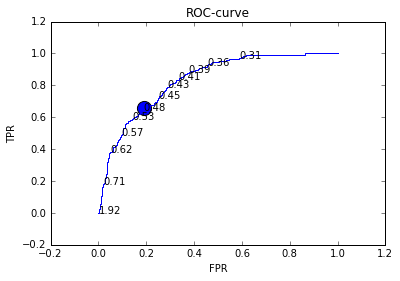

In [36]:
plt.plot(fpr,tpr)
plt.scatter([0.19],[0.66],s=200)#plotting 0.5 threshold
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-curve')
i=0
for xy in zip(fpr,tpr):
    if (i%20==0):
        plt.annotate('{0:.2f}'.format(thresholds[i]), xy=xy, textcoords='data')    
    if(i<len(fpr)):
        i+=1

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predict(w,X,value=True))#accuracy with alpha=0.5

0.75911458333333337

In [38]:
accuracy_score(y,predict(w,X,value=True,alpha=0.55))#final accuracy with  optimal alpha=0.55

0.77213541666666663